In [1]:
import pandas as pd

df = pd.read_csv("QueryResults.csv")
df.columns
df.count()

m             1991
TagName       1991
Unnamed: 2    1991
dtype: int64

In [2]:
# reading csv with modified column names, Setting the header row to 0 allows us to substitute our own column names
df = pd.read_csv("QueryResults.csv", names = ["Date", "Tag", "Posts"], header = 0)
df

,Date,Tag,Posts
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
...,...,...,...
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182


In [3]:
# count the number of posts per language
print(df.groupby("Tag").sum())

              Posts
Tag                
assembly      34852
c            336042
c#          1423530
c++          684210
delphi        46212
go            47499
java        1696403
javascript  2056510
perl          65286
php         1361988
python      1496210
r            356799
ruby         214582
swift        273055


In [4]:
# Which programming language had the most number of posts since the creation of Stack Overflow

# data cleansing : converting string type date to datetime
df["Date"] = pd.to_datetime(df["Date"])
tag_with_most_posts = df.groupby("Tag")["Posts"].sum().idxmax()
num_of_posts = df.groupby("Tag")["Posts"].sum().max()
print(f"Programming language with most number of posts since the creation of Stack Overflow is {tag_with_most_posts} with total posts count: {num_of_posts}")



Programming language with most number of posts since the creation of Stack Overflow is javascript with total posts count: 2056510


In [6]:
# pivot the df

pivoted_df = df.pivot(index='Date', columns='Tag', values='Posts')
pivoted_df.isna()
pivoted_df.fillna(0, inplace=True) 
pivoted_df

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [7]:
# count number of entres per language
pivoted_df.count()

Tag
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

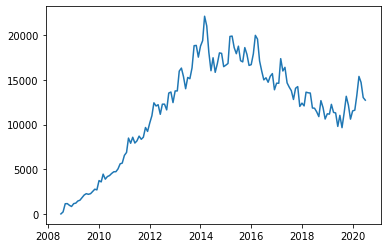

In [9]:
import matplotlib.pyplot as plt

# plot the popularity of the Java programming language

plt.plot(pivoted_df.index, pivoted_df['java'])

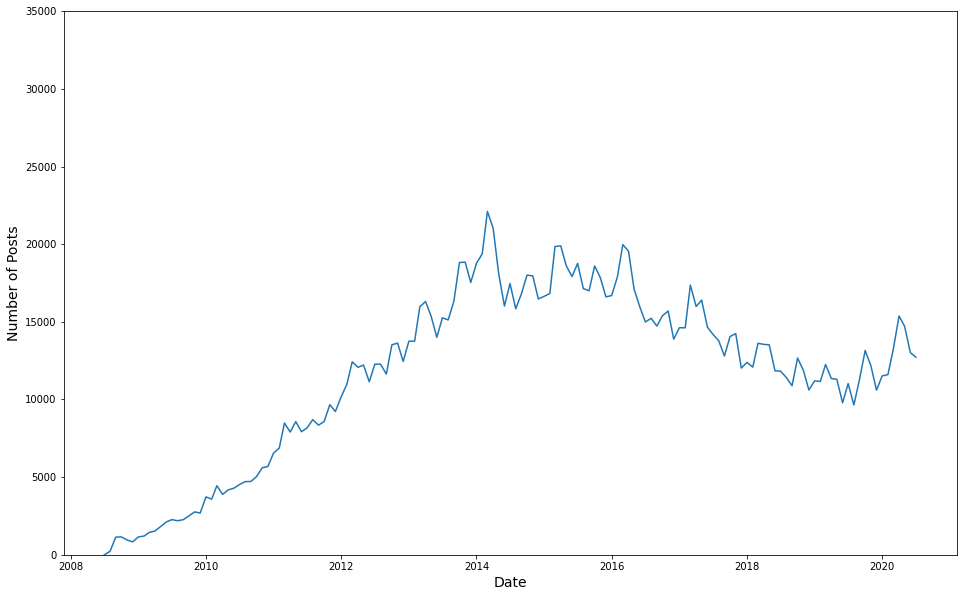

In [10]:
# styling the graph

plt.figure(figsize=(16,10))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(pivoted_df.index, pivoted_df['java'])

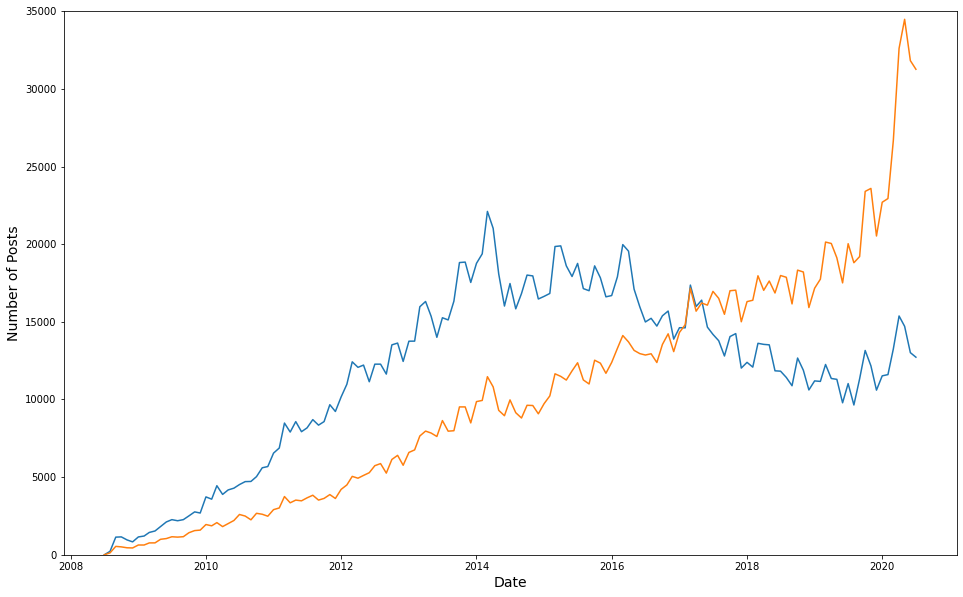

In [11]:
# plot both Java and Python next to each other

plt.figure(figsize=(16,10))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(pivoted_df.index, pivoted_df['java'])
plt.plot(pivoted_df.index, pivoted_df['python'])

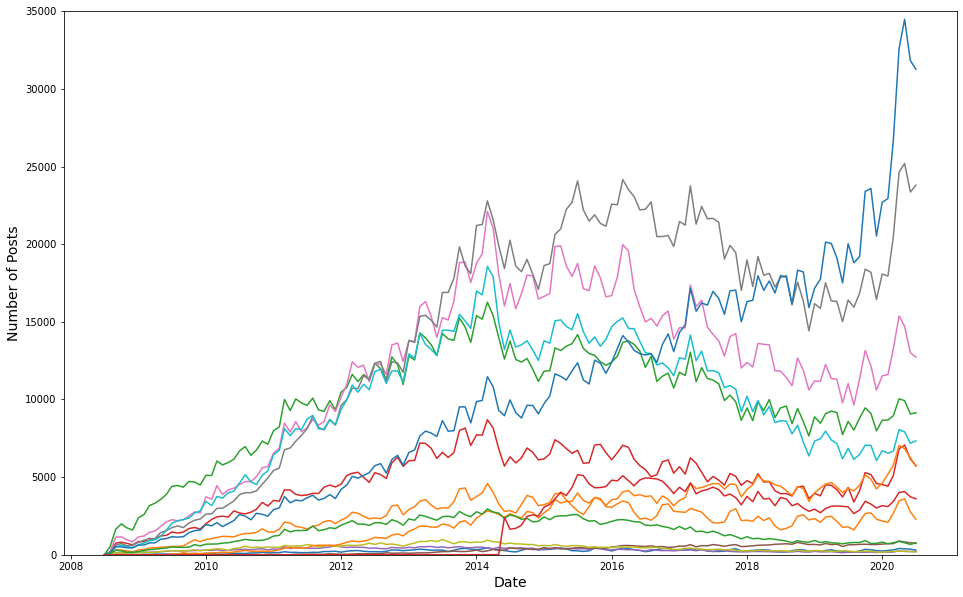

In [14]:
# plot all the programming languages on the same chart
plt.figure(figsize=(16,10))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in pivoted_df.columns:
  plt.plot(pivoted_df.index, pivoted_df[column])

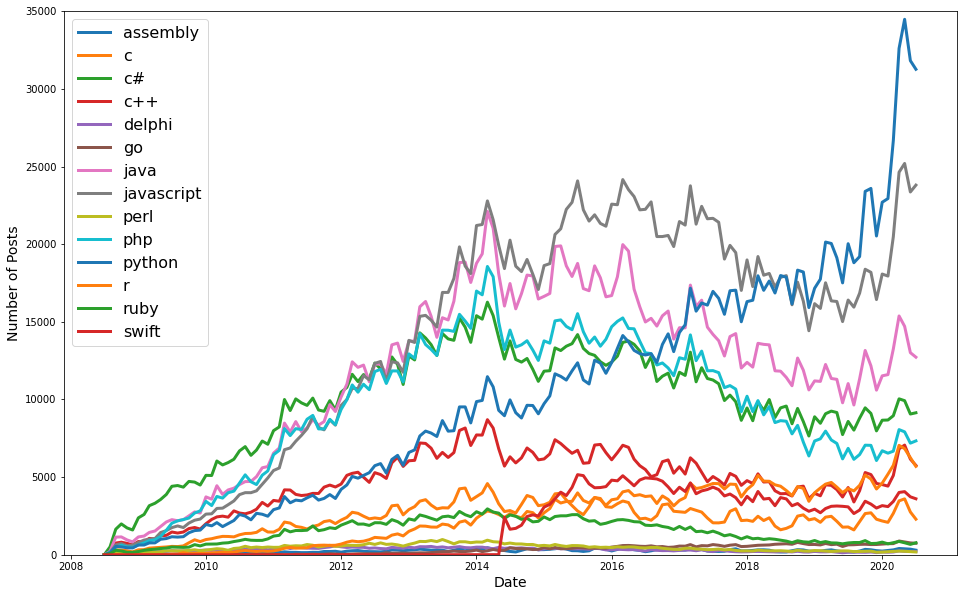

In [15]:
# add a label for each line based on the column name 
plt.figure(figsize=(16,10))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in pivoted_df.columns:
    plt.plot(pivoted_df.index, pivoted_df[column], 
             linewidth=3, label=pivoted_df[column].name)
 
plt.legend(fontsize=16)

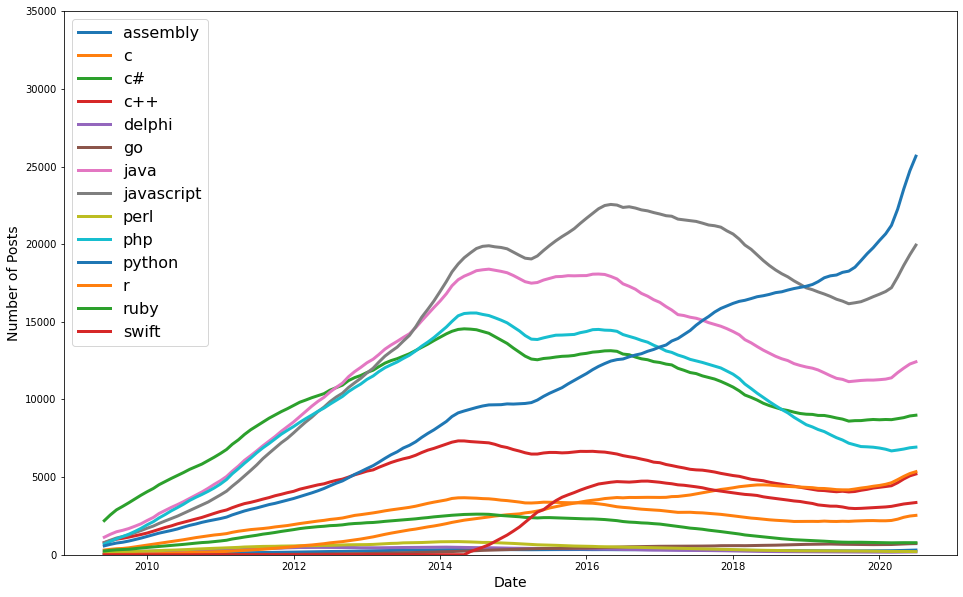

In [17]:
# smooth out the observations by taking an average. By averaging say, 6 or 12 observations, construct something called the rolling mean.
roll_df = pivoted_df.rolling(window=12).mean()
plt.figure(figsize=(16,10))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)